Harper Kerstens

## Research question/interests

Briefly describe your research question or interests here.
I will analyze the amount of times a product is purchased per transation to determine the most popular item to sell in bulk.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Import data to start EDA

In [2]:
data = pd.read_csv("../data/raw/data.csv", encoding= 'unicode_escape')
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

Create Visualization on information 

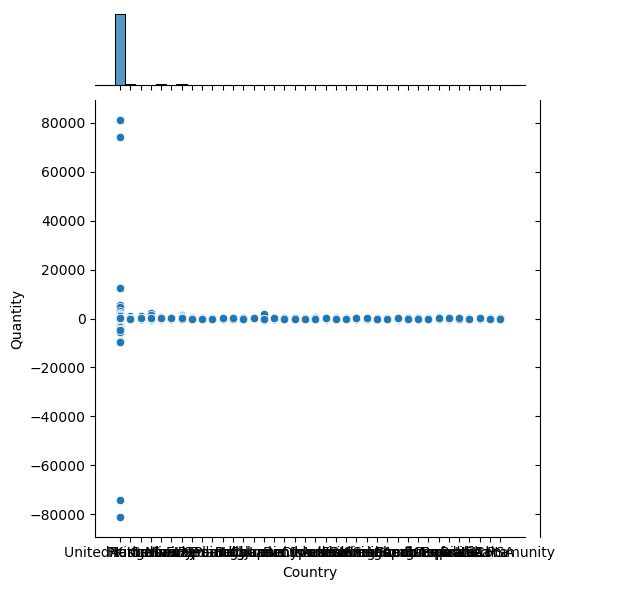

In [3]:
dataToViz = data

sns.jointplot(x="Country",y="Quantity", data = dataToViz)

Looking at this plot we can see there are some instances where that sway massively from the average. As well as some negative instances.

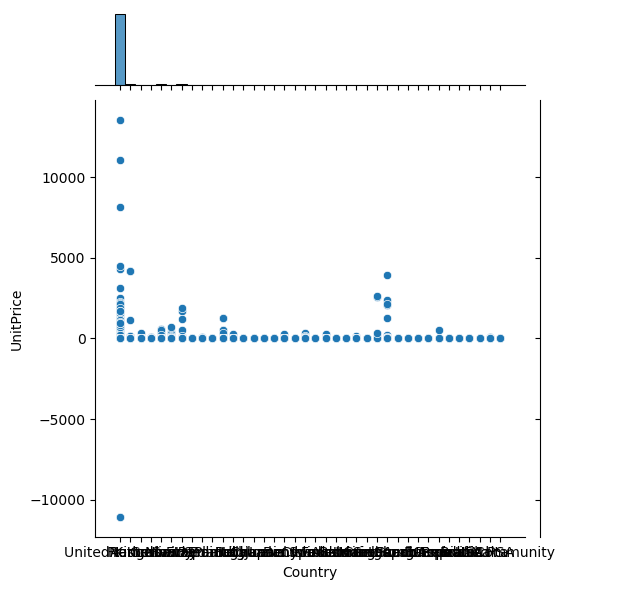

In [10]:
sns.jointplot(x="Country",y="UnitPrice", data= dataToViz)

Similarly when looking at unit prices we see some instances where data strays from the average greatly and the price being negative at points.

<AxesSubplot:xlabel='Country', ylabel='count'>

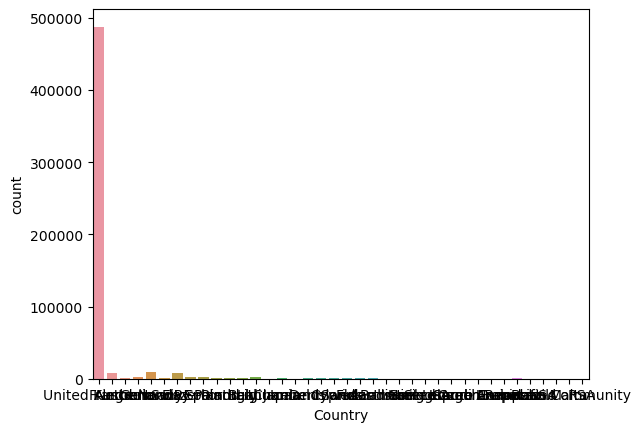

In [15]:
#sns.catplot(x="InvoiceNo", y= "Quantity", data= dataToViz)
sns.countplot(x="Country", data= dataToViz)

Through this plot we can see that the vast majority of purchases made are from the United Kingdom 

Now that I have the data Im going to clean it up a little bit by removing all purchases that Invoice number starts with C (C indicates a canceled order so the data is not valuable)

In [4]:
canceled = data['InvoiceNo'].str.startswith("C") == False
filtered_data = data[canceled]
# print(filtered_data.head(3))
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


For my own purposes Description, Country, Customer ID, Invoice Date and Unit Price are not information I will use so ill clean it up even further.

In [7]:
wantedHeaders = ["InvoiceNo","StockCode","Quantity"]
df = filtered_data[wantedHeaders]
df

,InvoiceNo,StockCode,Quantity
0,536365,85123A,6
1,536365,71053,6
2,536365,84406B,8
3,536365,84029G,6
4,536365,84029E,6
...,...,...,...
541904,581587,22613,12
541905,581587,22899,6
541906,581587,23254,4
541907,581587,23255,4


Method Chain, Import the cleaned data from new_data and then tailor to my question

In [11]:
cleanedData = pd.read_csv("../data/processed/new_data.csv", encoding= 'unicode_escape')

df1 = pd.DataFrame(cleanedData[["InvoiceNo","StockCode","Quantity"]])
df1


,InvoiceNo,StockCode,Quantity
0,536365,85123A,6
1,536365,71053,6
2,536365,84406B,8
3,536365,84029G,6
4,536365,84029E,6
...,...,...,...
406218,581587,22613,12
406219,581587,22899,6
406220,581587,23254,4
406221,581587,23255,4


Analysis on EDA

When printing out the charts to help visualize the data it became apparent that this set of data was extensively detailed and kept track of lots of information. This being both a positive and a negative. Data such as canceled transactions not being of use or interest towards my research question. The positive is the extensive detail of the dataset will help me accurately answer my research question with lots of empirical evidence to support. Figuring out how to navigate through the data using seaborn and other python functions was challenging but extremely rewarding to see things come together by having the puzzle pieces fall in place one by one.